In [8]:
# Recreate an illustrative "adiabatic evolution on eigenenergy landscape" plot
# - Pure matplotlib, no seaborn, no custom color settings (defaults only)
# - Written for a Jupyter cell; saves PNG and SVG for export

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from matplotlib.patheffects import withStroke



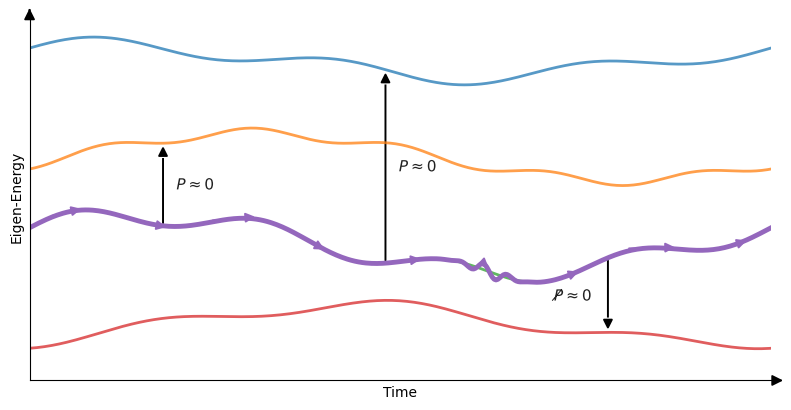

In [ ]:
# Transition arrows from the tracked path to the other eigenenergy levels

# Time axis
t = np.linspace(0, 1, 400)

# Toy eigenenergy bands (just smooth curves)
bands = [
    2.2 + 0.10*np.sin(2*np.pi*(t+0.15)) + 0.05*np.sin(6*np.pi*t),
    1.6 + 0.15*np.sin(2*np.pi*(t-0.05)) - 0.03*np.cos(10*np.pi*t),
    1.05 + 0.18*np.sin(2*np.pi*(t+0.10)) + 0.06*np.sin(8*np.pi*t),
    0.55 + 0.12*np.sin(2*np.pi*(t-0.18)) - 0.04*np.cos(6*np.pi*t),
]

# "Adiabatic path" that tracks the 3rd band with small avoided-crossing-like dip
path = bands[2].copy()
dip_center = 0.62
dip = 0.04*np.exp(-((t-dip_center)/0.03)**2) * np.sin(60*np.pi*(t-dip_center))  # small wiggle
path = path - dip

fig, ax = plt.subplots(figsize=(8, 4.2))

# Plot eigenenergy bands
for y in bands:
    ax.plot(t, y, lw=2, alpha=0.75)

# Plot the followed eigenstate path with slightly thicker line
(path_line,) = ax.plot(t, path, lw=3.5)
path_color = path_line.get_color()


def add_path_arrow(tau: float, *, length: float = 0.07) -> None:
    """Place a short arrow tangent to the followed path at time ``tau``."""

    idx = np.searchsorted(t, tau)
    idx = np.clip(idx, 1, t.size - 2)
    dt = t[idx + 1] - t[idx - 1]
    dy = path[idx + 1] - path[idx - 1]
    norm = np.hypot(dt, dy)
    if norm == 0.0:
        return
    direction = np.array([dt, dy]) / norm
    start = np.array([t[idx], path[idx]]) - 0.5 * length * direction
    end = start + length * direction
    arrow = FancyArrowPatch(
        tuple(start),
        tuple(end),
        arrowstyle="-|>",
        mutation_scale=14,
        lw=1.4,
        color=path_color,
    )
    arrow.set_path_effects([withStroke(linewidth=3, foreground="white")])
    ax.add_patch(arrow)


def interp_curve(curve: np.ndarray, tau: float) -> float:
    """Return the value of ``curve`` at a fractional time ``tau`` using linear interp."""

    return float(np.interp(tau, t, curve))


def transition_arrow(
    tau: float,
    target_curve: np.ndarray,
    label: str,
    *,
    text_align: str = "left",
    color: str = "#000000",
) -> None:
    """Draw a single-headed arrow pointing from the tracked path to ``target_curve``."""

    y_start = interp_curve(path, tau)
    y_end = interp_curve(target_curve, tau)
    arrow = FancyArrowPatch(
        (tau, y_start),
        (tau, y_end),
        arrowstyle="-|>",
        mutation_scale=14,
        lw=1.4,
        color=color,
    )
    arrow.set_path_effects([withStroke(linewidth=3, foreground="white")])
    ax.add_patch(arrow)

    offset = 0.018 if text_align == "left" else -0.018
    ha = "left" if text_align == "left" else "right"
    ax.text(
        tau + offset,
        0.5 * (y_start + y_end),
        label,
        ha=ha,
        va="center",
        fontsize=11,
        color="#222222",
        path_effects=[withStroke(linewidth=3, foreground="white")],
    )


arrow_times = np.linspace(0.05, 0.95, 9)
for tau in arrow_times:
    add_path_arrow(float(tau))

transition_specs = [
    (0.18, bands[1], r"$P \approx 0$", "left"),
    (0.48, bands[0], r"$P \approx 0$", "left"),
    (0.78, bands[3], r"$P \approx 0$", "right"),
]
for tau, target, label, align in transition_specs:
    transition_arrow(tau, target, label, text_align=align)

# Labels and axes styling
ax.set_xlabel("Time")
ax.set_ylabel("Eigen-Energy")
ax.set_xlim(0.0, 1.0)
ax.set_ylim(0.2, 2.5)
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
axis_arrow_style = dict(arrowstyle="-|>", mutation_scale=16, lw=1.3, color="#000000")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.annotate("", xy=(x1 + 0.02 * (x1 - x0), y0), xytext=(x1, y0),
            xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
ax.annotate("", xy=(x0, y1 + 0.02 * (y1 - y0)), xytext=(x0, y1),
            xycoords="data", arrowprops=axis_arrow_style, annotation_clip=False)
plt.tight_layout()
plt.show()


In [ ]:
# Save exports
png_path = "/home/yehon/projects/grape-crab-qoc/results.png"
svg_path = "/home/yehon/projects/grape-crab-qoc/results.svg"
plt.savefig(png_path, dpi=300, bbox_inches="tight")
plt.savefig(svg_path, bbox_inches="tight")